In [15]:
import os
import json
import torch
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()

import scipy.stats

In [16]:
os.chdir('/home/laetitia/work/OpenELM')

In [17]:
puzzles_tested = json.load(open('puzzles_dev.json', 'r'))

In [18]:
puzzles_tested[4]['sol_bodies'][0]

'    if m % 2 == 0:\n        ans = [[i, j, i + 1, j] for i in range(0, m, 2) for j in range(n)]\n    elif n % 2 == 0:\n        ans = [[i, j, i, j + 1] for i in range(m) for j in range(0, n, 2)]\n    else:\n        ans = [[i, j, i + 1, j] for i in range(1, m, 2) for j in range(n)]\n        ans += [[0, j, 0, j + 1] for j in range(0, n - 1, 2)]\n    return ans'

In [19]:
import ast
first_puz_str = puzzles_tested[0]['sat']

In [20]:
print(first_puz_str)

def sat(position: List[List[int]], target=[[3, 3]]):
    live = {x + y * 1j for x, y in position}  # complex numbers encode live cells
    deltas = (1j, -1j, 1, -1, 1 + 1j, 1 - 1j, -1 + 1j, -1 - 1j)
    visible = {z + d for z in live for d in deltas}
    next_step = {z for z in visible if sum(z + d in live for d in deltas) in ([2, 3] if z in live else [3])}
    return next_step == {x + y * 1j for x, y in target}


In [21]:
splitlines = first_puz_str.split('\n')
splitlines.insert(1, puzzles_tested[0]['sol_docstring'])
first_puz_str_doc = '\n'.join(splitlines)
print(first_puz_str_doc)

def sat(position: List[List[int]], target=[[3, 3]]):
    """
    Given a target pattern in Conway's Game of Life (see https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life ),
    specified by [x,y] coordinates of live cells, find a position that leads to that pattern on the next step.
    """
    live = {x + y * 1j for x, y in position}  # complex numbers encode live cells
    deltas = (1j, -1j, 1, -1, 1 + 1j, 1 - 1j, -1 + 1j, -1 - 1j)
    visible = {z + d for z in live for d in deltas}
    next_step = {z for z in visible if sum(z + d in live for d in deltas) in ([2, 3] if z in live else [3])}
    return next_step == {x + y * 1j for x, y in target}


In [22]:
parsed = ast.parse(first_puz_str_doc)

In [23]:
parsed.body[0].body

In [24]:
puzzles_tested[0].keys()

dict_keys(['name', 'sat', 'ans_type', 'sol_header', 'sol_docstring', 'sol_bodies', 'module', 'notes', 'weight'])

In [25]:
puzzles_tested[0]['sol_docstring'].strip().replace('"""\n', '').replace('\n    """', '').strip()

"Given a target pattern in Conway's Game of Life (see https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life ),\n    specified by [x,y] coordinates of live cells, find a position that leads to that pattern on the next step."

## Get in-context compression progress

In [27]:
save_dir = 'logs/compression_progress_test'
load_file_path = 'open_llama_3b_v2-2024-01-12_1_in-context_progress_results.json'
results = json.load(open(os.path.join(save_dir, load_file_path), 'r'))

### First examine the original losses

Text(0.5, 1.0, 'Histogram of the 15 original solution losses')

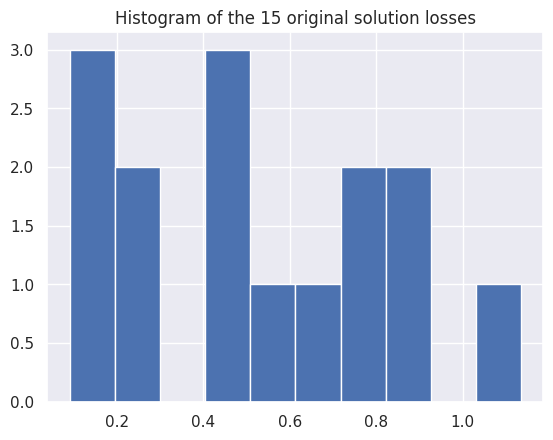

In [28]:
# compare the loss differences with the histogram below
plt.hist(results['original_losses'])
plt.title('Histogram of the 15 original solution losses')

In [29]:
def print_puzzle(index):
    print(f'Puzzle {index}')
    print(f'Compression score: {compression_matrix.mean(-1).tolist()[index]}' + "\n\n")
    print('```python')
    print(results["tested_puzzles"][index] + '\n\n' + results["tested_sols"][index])
    print('```')
    print('\n\n')

### What makes a problem have a high or low loss?

In [30]:
puzzle_indexes_and_losses = [(i, loss) for i, loss in enumerate(results['original_losses'])]
puzzle_indexes_and_losses = sorted(puzzle_indexes_and_losses, key=lambda x: x[1])

In [31]:
loss_indices = [x[0] for x in puzzle_indexes_and_losses]
loss_indices

[3, 5, 9, 10, 1, 2, 11, 8, 12, 6, 0, 13, 4, 7, 14]

In [32]:
compression_matrix = torch.Tensor(results['compression_progress'])

In [33]:
print(len(puzzles_tested))
compression_matrix.shape

20


torch.Size([15, 15])

In [34]:
# print puzzles
for i in range(len(results['tested_puzzles'])):
    print_puzzle(i)

Puzzle 0
Compression score: 0.00843376386910677


```python
def f(n: int, a=232610, b=3131721474, lower_bound=15000):
    """Find a large common divisor of two integers."""
    return a % n == 0 and b % n == 0 and n >= lower_bound

def g(a=232610, b=3131721474, lower_bound=15000):
    m, n = min(a, b), max(a, b)
    while m > 0:
        m, n = n % m, m
    return n
```



Puzzle 1
Compression score: -0.0032894150353968143


```python
def f(li: List[int], k=8):
    """Find k positive integers such that each integer divides (the product of the rest plus 1)."""
    def prod(nums):
        ans = 1
        for i in nums:
            ans *= i
        return ans

    return min(li) > 1 and len(li) == k and all((1 + prod(li[:i] + li[i + 1:])) % li[i] == 0 for i in range(k))

def g(k=8):
    n = 2
    prod = 1
    ans = []
    while len(ans) < k:
        ans.append(n)
        prod *= n
        n = prod + 1
    return ans
```



Puzzle 2
Compression score: -0.014710517600178719


```python
def f

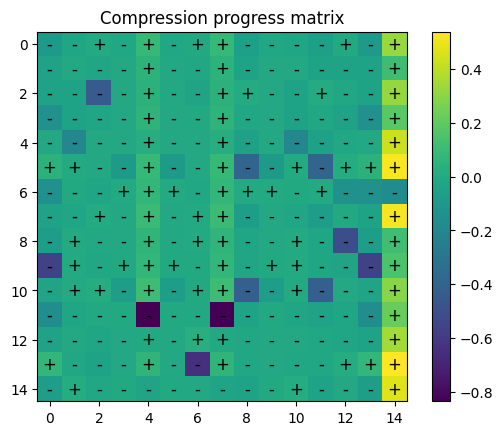

In [35]:
def plot_compression(matrix):
    plt.rcdefaults()
#     matrix[0, 3] = 1
    
    plt.imshow(matrix, cmap='viridis')

    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
    #         print(matrix[i, j] * 1000)
            if matrix[i, j].item() >= 0:
                t = '+'
            else:
                t = '-'
            text = plt.text(j, i, t,
                            ha="center", va="center", color="black", fontsize=12)

    # Display the plot
    plt.colorbar()  # To show the color bar
    plt.title('Compression progress matrix')

    plt.show()
    
    sns.set_theme()

plot_compression(compression_matrix)

In [36]:
compression_matrix.shape

torch.Size([15, 15])

In [37]:
print(f'Number of puzzles tested: {len(results["tested_puzzles"])}')
print(f'Number of solutions tested: {len(results["tested_sols"])}')
print(f'Number of puzzles tested: {len(results["archive_puzzles"])}')
print(f'Number of solutions tested: {len(results["archive_sols"])}')

Number of puzzles tested: 15
Number of solutions tested: 15
Number of puzzles tested: 15
Number of solutions tested: 15


Text(0.5, 1.0, 'in-context compression progress')

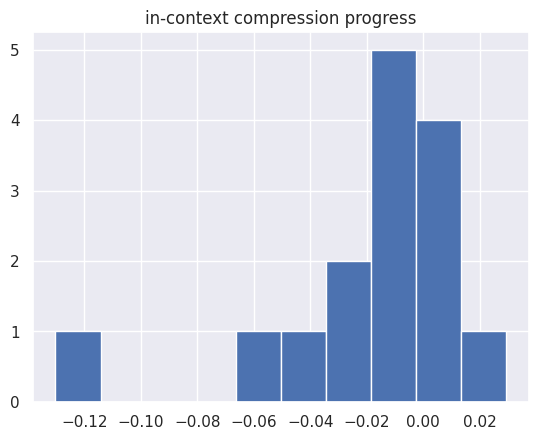

In [38]:
plt.hist(compression_matrix.mean(-1).tolist())
plt.title('in-context compression progress')

In [40]:
print_puzzle(11)

Puzzle 11
Compression score: -0.1302395761013031


```python
def f(big_str: str, sub_str="quadox", index=75):
    """Find a string whose *first* index of sub_str is index"""
    return big_str.index(sub_str) == index

def g(sub_str="quadox", index=75):
    i = ord('A')
    while chr(i) in sub_str:
        i += 1
    return chr(i) * index + sub_str
```





In [41]:
compression_matrix.mean(-1).tolist()

[0.00843376386910677,
 -0.0032894150353968143,
 -0.014710517600178719,
 -0.011730951257050037,
 -0.0049027493223547935,
 -0.014766502194106579,
 -0.030010394752025604,
 0.02944362908601761,
 -0.030149439349770546,
 -0.06113685294985771,
 -0.03886064514517784,
 -0.1302395761013031,
 0.01310268696397543,
 0.00454789400100708,
 0.012600645422935486]

In [184]:
compression_matrix.shape

torch.Size([15, 15])

In [185]:
results.keys()

dict_keys(['progress_type', 'progress_metric', 'tested_puzzle_names', 'tested_puzzles', 'tested_sols', 'archive_puzzle_names', 'archive_puzzles', 'archive_sols', 'compression_progress', 'original_losses'])

Text(0.5, 1.0, 'Histogram of the 15 original solution losses')

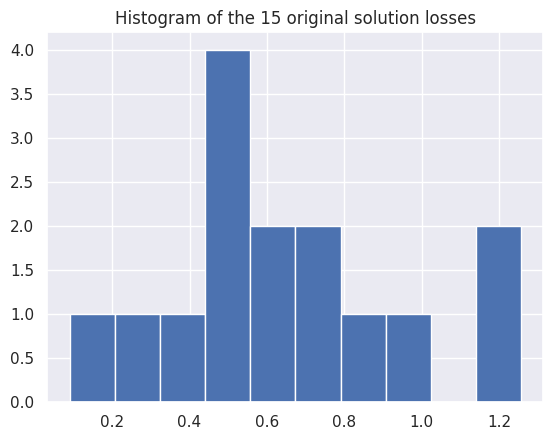

In [186]:
# compare the loss differences with the histogram below
plt.hist(results['original_losses'])
plt.title('Histogram of the 15 original solution losses')

In [187]:
# print the 3 most helpful and least helpful puzzles
per_puzzle_compression_and_indices = [(i, compression) for i, compression in enumerate(compression_matrix.mean(-1).tolist())]
per_puzzle_compression_and_indices = sorted(per_puzzle_compression_and_indices, key=lambda x: x[1])

In [188]:
per_puzzle_compression_and_indices
indices = [pc[0] for pc in per_puzzle_compression_and_indices]

In [189]:
indices

[6, 12, 11, 14, 1, 9, 8, 2, 3, 13, 0, 10, 4, 5, 7]

In [190]:
most_useful_puzzles = indices[:3]
least_useful_puzzles = indices[-3:]

In [191]:
for i in range(len(results['tested_puzzles'])):
    print_puzzle(i)

Puzzle 0
Compression score: -0.02857038378715515


```python
def f(n: int, a=232610, b=3131721474, lower_bound=15000):
    """Find a large common divisor of two integers."""
    return a % n == 0 and b % n == 0 and n >= lower_bound

def g(a=232610, b=3131721474, lower_bound=15000):
    m, n = min(a, b), max(a, b)
    while m > 0:
        m, n = n % m, m
    return n
```



Puzzle 1
Compression score: -0.05699805170297623


```python
def f(li: List[int], k=8):
    """Find k positive integers such that each integer divides (the product of the rest plus 1)."""
    def prod(nums):
        ans = 1
        for i in nums:
            ans *= i
        return ans

    return min(li) > 1 and len(li) == k and all((1 + prod(li[:i] + li[i + 1:])) % li[i] == 0 for i in range(k))

def g(k=8):
    n = 2
    prod = 1
    ans = []
    while len(ans) < k:
        ans.append(n)
        prod *= n
        n = prod + 1
    return ans
```



Puzzle 2
Compression score: -0.052772775292396545


```python
def f(

In [192]:
most_useful_puzzles

[6, 12, 11]

In [193]:
least_useful_puzzles

[4, 5, 7]

In [194]:
for i in most_useful_puzzles:
    print_puzzle(i)

Puzzle 6
Compression score: -0.09808620810508728


```python
def f(ans: List[List[int]], target=17):
    """
    Find a list of pairs of integers where the number of pairs in which the second number is more than
    two greater than the first number is a given constant
    """
    for i in range(len(ans)):
        a, b = ans[i]
        if b - a >= 2:
            target -= 1
    return target == 0

def g(target=17):
    return [[0, 2]] * target
```



Puzzle 12
Compression score: -0.09275094419717789


```python
def f(bills: List[int], denominations=[1, 10, 23, 49], n=74, max_len=4):
    """
    Find the shortest sequence (length <= max_len) that sum to n, where each number is in denominations
    """
    return sum(bills) == n and all(b in denominations for b in bills) and len(bills) <= max_len

def g(denominations=[1, 10, 23, 49], n=74, max_len=4):
    """
    This solution uses dynamic programming, I believe it could be further sped up without having to count
    all the way up to de

In [195]:
for i in least_useful_puzzles:
    print_puzzle(i)

Puzzle 4
Compression score: -0.021360129117965698


```python
def f(s: str, a="diquatextaxubowafucevyhuquuthexitacavobychajexytextug", b="thachevolatvyhuquuthexitacavobyjokobuchudymal", length=20):
    """Find a string of length length that is in both strings a and b"""
    return len(s) == length and s in a and s in b

def g(a="diquatextaxubowafucevyhuquuthexitacavobychajexytextug", b="thachevolatvyhuquuthexitacavobyjokobuchudymal", length=20):
    for i in range(len(a) - length + 1):
        if a[i:i + length] in b:
            return a[i:i + length]
```



Puzzle 5
Compression score: -0.021130265668034554


```python
def f(n: int, pairs=[[459604, 0], [364611, 68505], [562652, 512251], [668655, 471975], [464486, 626280], [138684, 177065], [163296, 68630], [188271, 104677], [367839, 338137], [73022, 362103], [464143, 484458], [214935, 189299], [643725, 283515], [908210, 541732], [710201, 234839], [854230, 34479], [3288, 675724], [846637, 396244], [0, 2526576]]):
    """
    Given a se

### Is compression progress correlated with the original average loss of the puzzle?

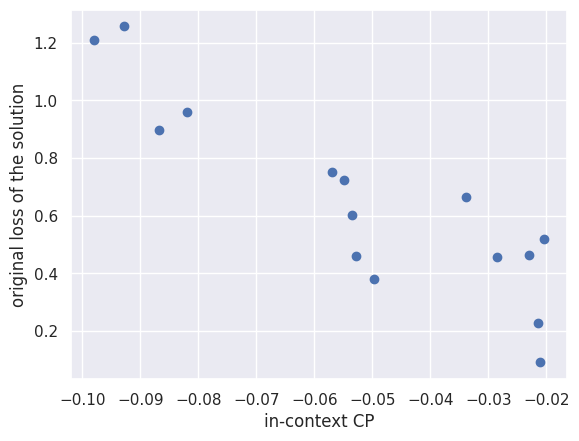

In [196]:
plt.scatter(compression_matrix.mean(-1).tolist(), results['original_losses'])
plt.xlabel('in-context CP')
plt.ylabel('original loss of the solution')
plt.show()

In [197]:
correlation, p_value = scipy.stats.pearsonr(compression_matrix.mean(-1).tolist(), results['original_losses'])
print("Pearson's correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson's correlation coefficient: -0.8890866174116224
P-value: 9.296348883611363e-06


### Remove diagonal values

In [198]:
for i in range(len(compression_matrix)):
    compression_matrix[i, i] = 0.

Text(0.5, 1.0, 'Average of the non-diagonal contributions to CP')

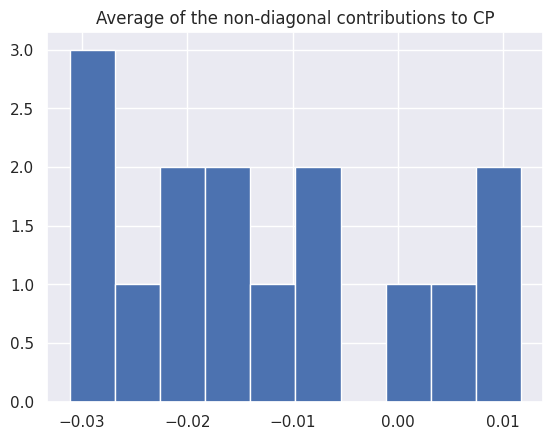

In [199]:
plt.hist(compression_matrix.mean(-1).tolist())
plt.title("Average of the non-diagonal contributions to CP")

In [200]:
compression_matrix.mean(-1).tolist()

[-0.0010250533232465386,
 -0.0094798244535923,
 -0.02335944212973118,
 -0.02922186627984047,
 -0.00813592504709959,
 -0.015350822359323502,
 -0.030961869284510612,
 0.01167330238968134,
 -0.019758062437176704,
 -0.017155708745121956,
 0.004626167006790638,
 -0.031142663210630417,
 -0.010053540579974651,
 0.009532270953059196,
 -0.01950863189995289]

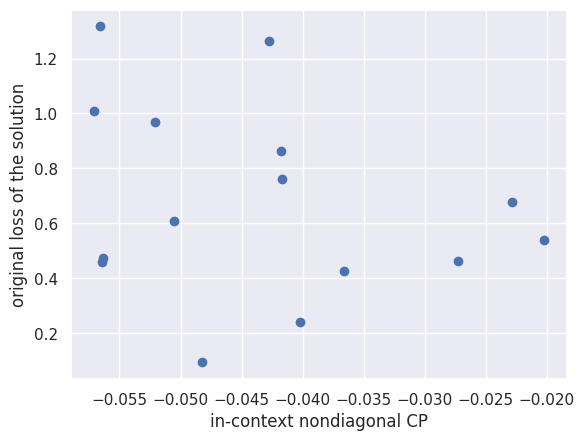

In [167]:
plt.scatter(compression_matrix.mean(-1).tolist(), results['original_losses'])
plt.xlabel('in-context nondiagonal CP')
plt.ylabel('original loss of the solution')
plt.show()

In [168]:
correlation, p_value = scipy.stats.pearsonr(compression_matrix.mean(-1).tolist(), results['original_losses'])
print("Pearson's correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson's correlation coefficient: -0.258235070181946
P-value: 0.3527480870594169


In [169]:
# print the 3 most helpful and least helpful puzzles
per_puzzle_compression_and_indices = [(i, compression) for i, compression in enumerate(compression_matrix.mean(-1).tolist())]
per_puzzle_compression_and_indices = sorted(per_puzzle_compression_and_indices, key=lambda x: x[1])
indices = [pc[0] for pc in per_puzzle_compression_and_indices]
indices

[11, 6, 2, 3, 14, 8, 5, 12, 9, 1, 4, 0, 10, 13, 7]

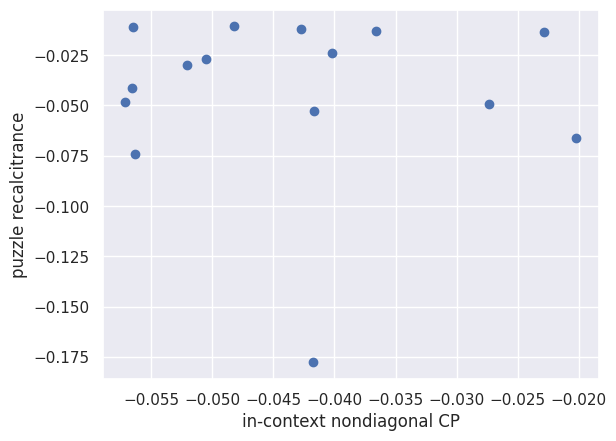

In [170]:
plt.scatter(compression_matrix.mean(-1).tolist(), compression_matrix.mean(0).tolist())
plt.xlabel('in-context nondiagonal CP')
plt.ylabel('puzzle recalcitrance')
plt.show()

### Compare with hanoi puzzle as baseline

In [105]:
load_file_path = 'open_llama_3b_v2-2024-01-08_hanoiref_in-context_progress_results.json'
results = json.load(open(os.path.join(save_dir, load_file_path), 'r'))
compression_matrix = torch.Tensor(results['compression_progress'])

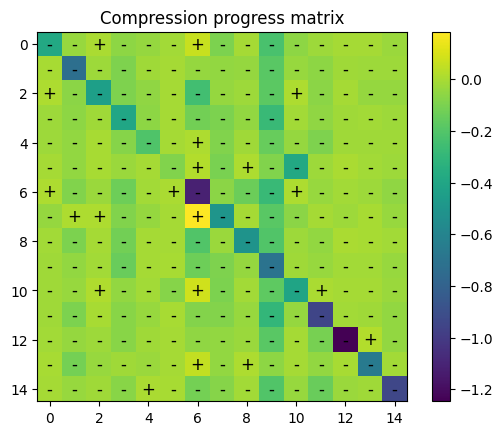

In [106]:
plot_compression(compression_matrix)

Text(0.5, 1.0, 'Average of the non-diagonal contributions to CP (Hanoi) baseline')

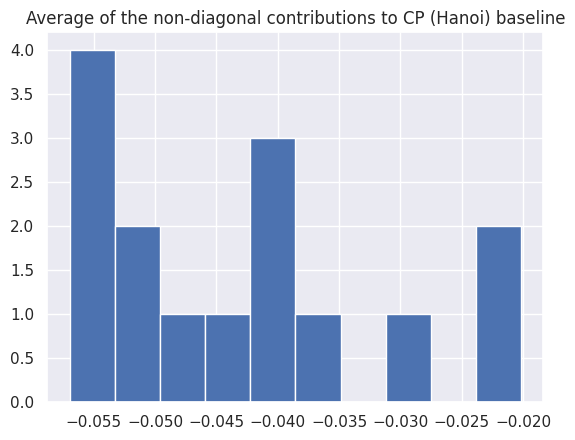

In [108]:
# remove diagonals
for i in range(len(compression_matrix)):
    compression_matrix[i, i] = 0.

plt.hist(compression_matrix.mean(-1).tolist())
plt.title("Average of the non-diagonal contributions to CP (Hanoi) baseline")

In [109]:
per_puzzle_compression_and_indices = [(i, compression) for i, compression in enumerate(compression_matrix.mean(-1).tolist())]
per_puzzle_compression_and_indices = sorted(per_puzzle_compression_and_indices, key=lambda x: x[1])
indices = [pc[0] for pc in per_puzzle_compression_and_indices]
indices

[6, 11, 2, 3, 8, 14, 5, 12, 1, 9, 4, 0, 10, 13, 7]

Text(0, 0.5, 'Puzzles sorted by ascending CP (hanoi)')

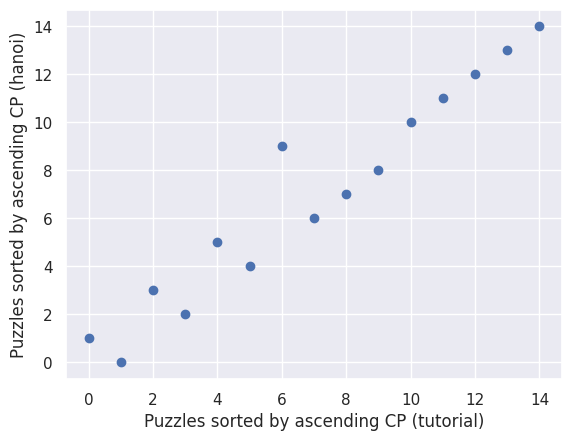

In [112]:
l1 = [11, 6, 3, 2, 14, 8, 9, 5, 12, 1, 4, 0, 10, 13, 7]
l2 = [6, 11, 2, 3, 8, 14, 5, 12, 1, 9, 4, 0, 10, 13, 7]
ranks1 = [l1.index(i) for i in range(len(indices))]
ranks2 = [l2.index(i) for i in range(len(indices))] 
plt.scatter(ranks1, ranks2)
plt.xlabel('Puzzles sorted by ascending CP (tutorial)')
plt.ylabel('Puzzles sorted by ascending CP (hanoi)')

In [113]:
ranks1


[11, 9, 3, 2, 10, 7, 1, 14, 5, 6, 12, 0, 8, 13, 4]

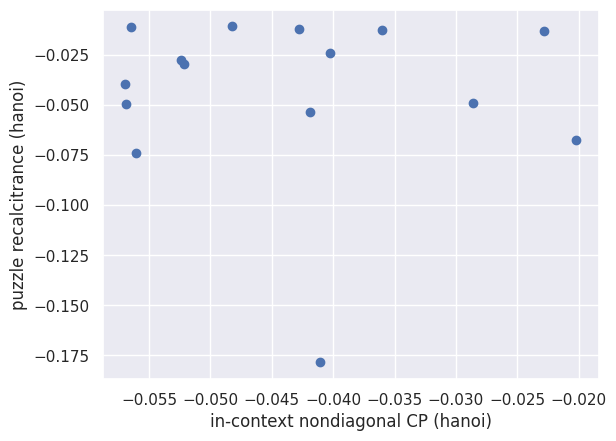

In [114]:
plt.scatter(compression_matrix.mean(-1).tolist(), compression_matrix.mean(0).tolist())
plt.xlabel('in-context nondiagonal CP (hanoi)')
plt.ylabel('puzzle recalcitrance (hanoi)')
plt.show()

## Get finetuning cp

(array([1., 0., 1., 3., 3., 2., 2., 1., 1., 1.]),
 array([-1.42560003e-03, -1.12653904e-03, -8.27478059e-04, -5.28417074e-04,
        -2.29356089e-04,  6.97048963e-05,  3.68765881e-04,  6.67826866e-04,
         9.66887851e-04,  1.26594884e-03,  1.56500982e-03]),
 <BarContainer object of 10 artists>)

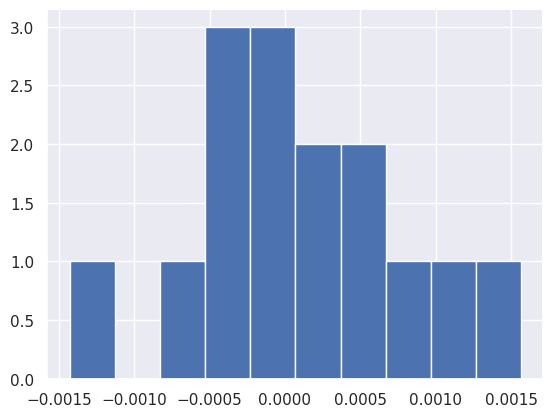

In [58]:
load_file_path = 'open_llama_3b_v2-2024-01-04_finetuning_progress_results.json'
results = json.load(open(os.path.join(save_dir, load_file_path), 'r'))
compression_matrix = torch.Tensor(results['compression_progress'])
plt.hist(compression_matrix.mean(-1).tolist())

In [59]:
# print the 3 most helpful and least helpful puzzles
f_per_puzzle_compression_and_indices = [(i, compression) for i, compression in enumerate(compression_matrix.mean(-1).tolist())]
f_per_puzzle_compression_and_indices = sorted(f_per_puzzle_compression_and_indices, key=lambda x: x[1])
f_indices = [pc[0] for pc in f_per_puzzle_compression_and_indices]
f_most_useful_puzzles = f_indices[:3]
f_least_useful_puzzles = f_indices[-3:]

In [60]:
f_most_useful_puzzles

[8, 0, 4]

In [61]:
f_least_useful_puzzles

[1, 3, 6]

In [62]:
for i in f_most_useful_puzzles:
    print_puzzle(i)

Compression score: -0.0014256000285968184


def f(x: List[int], n=9909, s=88140438):
    """Find a list of n non-negative integers that sum up to s"""
    return len(x) == n and sum(x) == s and all([a > 0 for a in x])

def g(n=9909, s=88140438):
    x = [1] * n
    x[0] = s - n + 1
    return x




Compression score: -0.0005774919991381466


def f(n: int, a=232610, b=3131721474, lower_bound=15000):
    """Find a large common divisor of two integers."""
    return a % n == 0 and b % n == 0 and n >= lower_bound

def g(a=232610, b=3131721474, lower_bound=15000):
    m, n = min(a, b), max(a, b)
    while m > 0:
        m, n = n % m, m
    return n




Compression score: -0.0004076356708537787


def f(s: str, a="diquatextaxubowafucevyhuquuthexitacavobychajexytextug", b="thachevolatvyhuquuthexitacavobyjokobuchudymal", length=20):
    """Find a string of length length that is in both strings a and b"""
    return len(s) == length and s in a and s in b

def g(a="diquatextaxubowafucevyhuquuthex

In [63]:
for i in f_least_useful_puzzles:
    print_puzzle(i)

Compression score: 0.0008079598192125559


def f(li: List[int], k=8):
    """Find k positive integers such that each integer divides (the product of the rest plus 1)."""
    def prod(nums):
        ans = 1
        for i in nums:
            ans *= i
        return ans

    return min(li) > 1 and len(li) == k and all((1 + prod(li[:i] + li[i + 1:])) % li[i] == 0 for i in range(k))

def g(k=8):
    n = 2
    prod = 1
    ans = []
    while len(ans) < k:
        ans.append(n)
        prod *= n
        n = prod + 1
    return ans




Compression score: 0.0010762144811451435


def f(x: List[int], a=-44635, s=5046, e=503563):
    """Create a list that is a subrange of an arithmetic sequence."""
    return x[0] == a and x[-1] <= e and (x[-1] + s > e) and all([x[i] + s == x[i + 1] for i in range(len(x) - 1)])

def g(a=-44635, e=503563, s=5046):
    return list(range(a, e + 1, s))




Compression score: 0.0015650098212063313


def f(ans: List[List[int]], target=17):
    """
    Find a list of pa

In [64]:
indices

[6, 12, 11, 14, 1, 9, 2, 8, 3, 13, 0, 10, 4, 5, 7]

In [65]:
f_indices

[8, 0, 4, 12, 10, 14, 13, 9, 5, 2, 11, 7, 1, 3, 6]

In [66]:
# get correlation between ranks
in_context_ranks = [indices.index(i) for i in range(len(indices))]
finetuning_ranks = [f_indices.index(i) for i in range(len(indices))] 

In [67]:
in_context_ranks

[10, 4, 6, 8, 12, 13, 0, 14, 7, 5, 11, 2, 1, 9, 3]

In [68]:
finetuning_ranks

[1, 12, 9, 13, 2, 8, 14, 11, 0, 7, 4, 10, 3, 6, 5]

### Is in-context compression progress correlated with finetuning compression progress?

Text(0.5, 1.0, 'CP ranks for in-context learning vs finetuning')

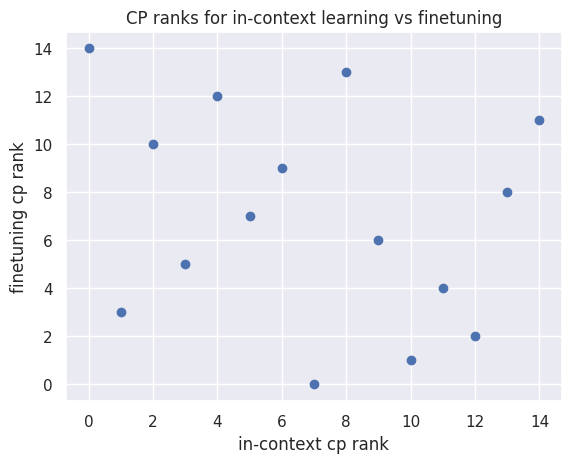

In [69]:
plt.scatter(in_context_ranks, finetuning_ranks)
plt.xlabel('in-context cp rank')
plt.ylabel('finetuning cp rank')
plt.title('CP ranks for in-context learning vs finetuning')

In [70]:
rho, p_value = scipy.stats.spearmanr(indices, f_indices)
print("Spearman's correlation coefficient:", rho)
print("P-value:", p_value)

Spearman's correlation coefficient: -0.24642857142857136
P-value: 0.37595051597380524


In [71]:
correlation, p_value = scipy.stats.pearsonr(indices, f_indices)
print("Pearson's correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson's correlation coefficient: -0.24642857142857133
P-value: 0.37595051597380497


In [72]:
from matplotlib.ticker import ScalarFormatter
# Create a formatter
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))

In [73]:
# function for getting the matrix and graph
def analyze_run(run_name, xlabel=None, plot_hist=True, plot_matrix=True):
    results = json.load(open(os.path.join(save_dir, run_name), 'r'))
    
    d = {}
    d['compression_matrix'] = torch.Tensor(results['compression_progress'])
    d['per_puzzle_compression_and_indices'] = [(i, compression) for i, compression in enumerate(compression_matrix.mean(-1).tolist())]
    d['per_puzzle_compression_and_indices'] = sorted(per_puzzle_compression_and_indices, key=lambda x: x[1])
    d['indices'] = [pc[0] for pc in per_puzzle_compression_and_indices]
    d['most_useful_puzzles'] = indices[:3]
    d['least_useful_puzzles'] = indices[-3:]
    
    if plot_hist:
        plt.hist(d['compression_matrix'].mean(-1).tolist())

        # Apply the formatter to the x-axis
        plt.gca().xaxis.set_major_formatter(formatter)

        if xlabel is None:
            plt.xlabel('Compression progress')
        else:
            plt.xlabel(xlabel)
        plt.ylabel('Puzzle count')
        plt.show()
        plt.clf()
    
    if plot_matrix:
        plot_compression(d['compression_matrix'])
    
    return d

Learning rate: 0.001


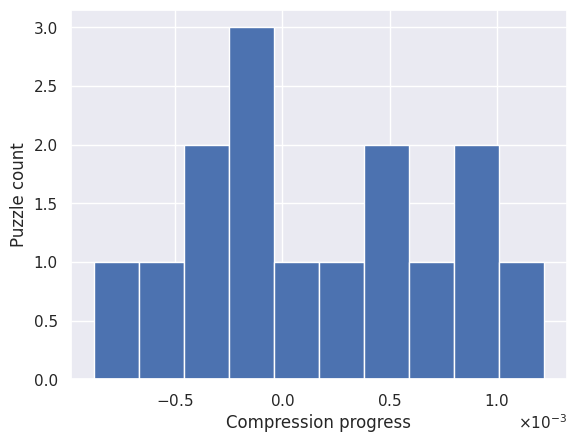

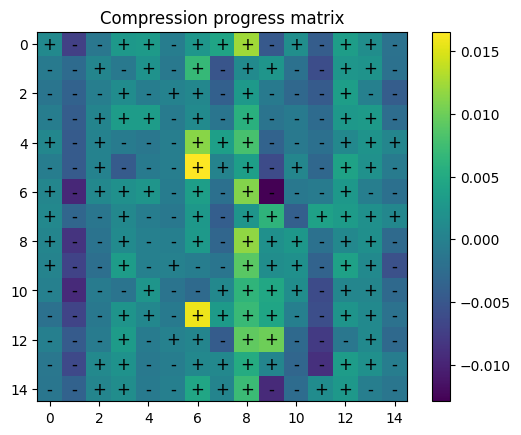

Learning rate: 0.0005


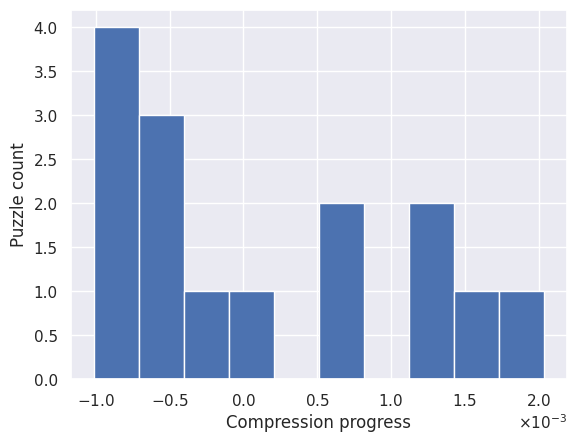

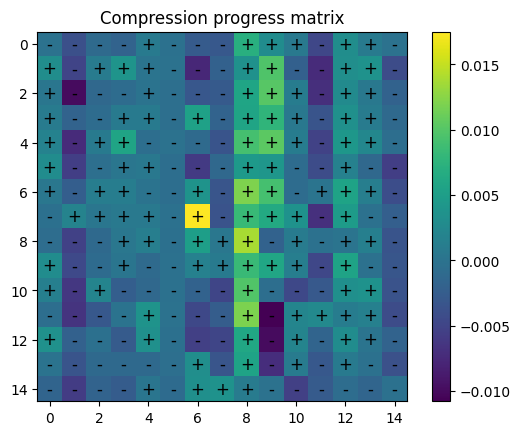

Learning rate: 0.0001


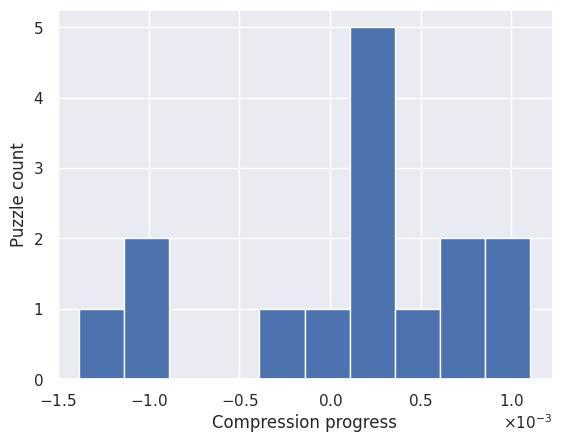

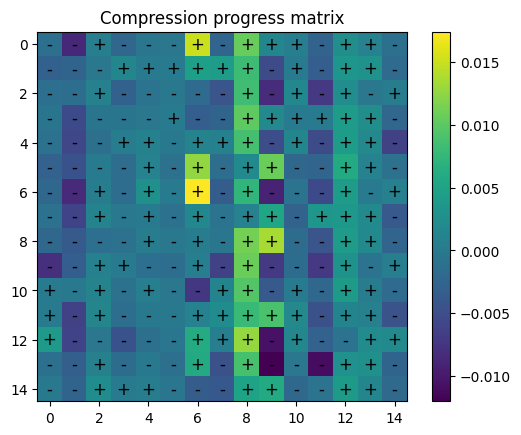

Learning rate: 0.0005


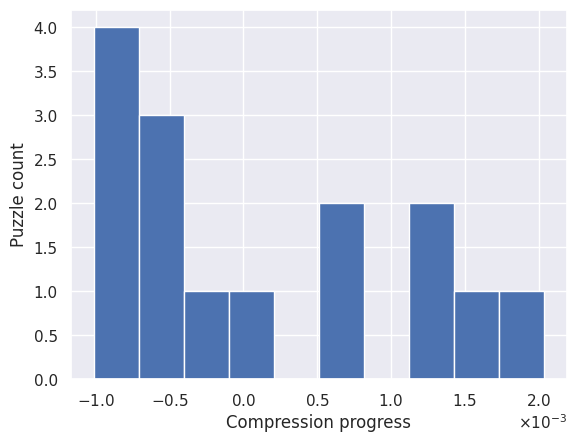

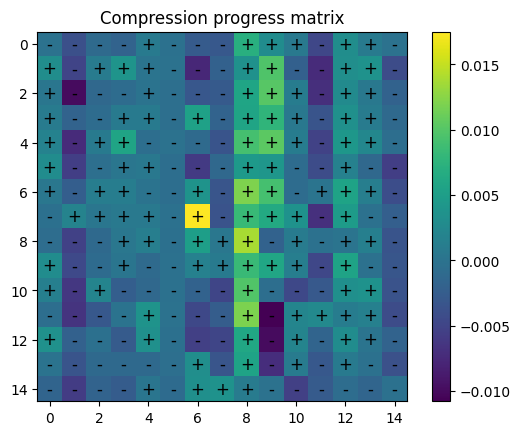

In [107]:
learning_rates = [1e-3, 5e-4, 1e-4, 5e-4]
for learning_rate in learning_rates:
    title = f'open_llama_3b_v2-2024-01-08_lr{learning_rate}_finetuning_progress_results.json'
    print(f'Learning rate: {learning_rate}')
    analyze_run(title)

In [40]:
print_puzzle(8)

Compression score: -0.0014256000285968184


def f(x: List[int], n=9909, s=88140438):
    """Find a list of n non-negative integers that sum up to s"""
    return len(x) == n and sum(x) == s and all([a > 0 for a in x])

def g(n=9909, s=88140438):
    x = [1] * n
    x[0] = s - n + 1
    return x






In [41]:
print_puzzle(9)

Compression score: 7.323424142668955e-06


def f(z: float, v=9, d=1e+83):
    """Create a float with a specific decimal."""
    return int(z * 1 / d % 10) == v

def g(v=9, d=1e+83):
    return v * d






### Is finetuning CP linked to the puzzle original loss?

In [42]:
load_file_path = 'open_llama_3b_v2-2024-01-04_finetuning_progress_results.json'
compression_matrix = json.load(open(os.path.join(save_dir, load_file_path), 'r'))['compression_progress']

In [43]:
compression_matrix = torch.Tensor(compression_matrix)
compression_matrix.shape

torch.Size([15, 15])

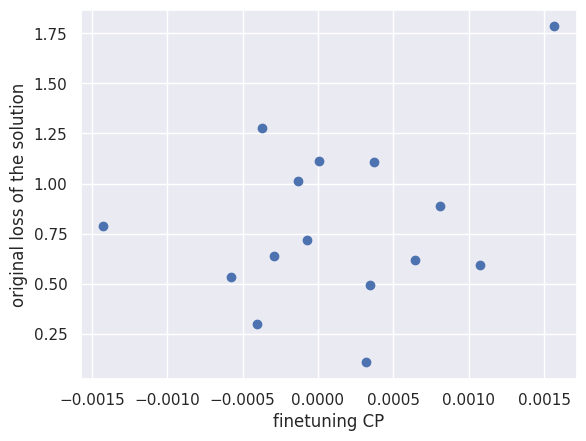

In [44]:
plt.scatter(compression_matrix.mean(-1).tolist(), results['original_losses'])
plt.xlabel('finetuning CP')
plt.ylabel('original loss of the solution')
plt.show()

No relationship seems visible.

## Notes for later

There are a few other relationships we might want to investigate, such as:
* How predictably does a higher average solution loss translate to a lower performance in solving the puzzle?
* Can we demonstrate a relationship between CP and how much these puzzles contribute to getting better on the test set? (do experiments where we only select half the puzzles in the train to finetune);
* Can we do the same for solution loss?
* (Linked to the first point) can we demonstrate a relationship between in-context compression progress and in-context learning progress?
* Is the apparent randomness in finetuning CP due to the samples we constructs (finetuning on better prompts might give better results?)

### Compare dev set with aces dev set

In [43]:
# dev puzzles against dev (nondiag)
data1 = [-0.0010250533232465386,
 -0.0094798244535923,
 -0.02335944212973118,
 -0.02922186627984047,
 -0.00813592504709959,
 -0.015350822359323502,
 -0.030961869284510612,
 0.01167330238968134,
 -0.019758062437176704,
 -0.017155708745121956,
 0.004626167006790638,
 -0.031142663210630417,
 -0.010053540579974651,
 0.009532270953059196,
 -0.01950863189995289]

# aces puzzles against dev
data2 = [0.004897373728454113,
 0.02128552459180355,
 -0.010313856415450573,
 0.027245057746767998,
 0.026844285428524017,
 0.022359546273946762,
 0.0020243481267243624,
 0.013409641571342945,
 0.021023379638791084,
 0.027510134503245354,
 0.0020243481267243624,
 0.039917849004268646,
 0.016323043033480644,
 0.025815468281507492]

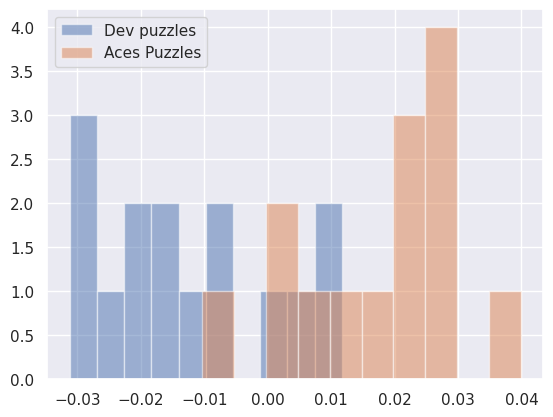

In [203]:
plt.hist(data1, alpha=0.5, label='Dev puzzles')
plt.hist(data2, alpha=0.5, label='Aces Puzzles')
plt.legend()
plt.show()

In [42]:
# dev puzzles against dev1
data3 = [0.00843376386910677,
 -0.0032894150353968143,
 -0.014710517600178719,
 -0.011730951257050037,
 -0.0049027493223547935,
 -0.014766502194106579,
 -0.030010394752025604,
 0.02944362908601761,
 -0.030149439349770546,
 -0.06113685294985771,
 -0.03886064514517784,
 -0.1302395761013031,
 0.01310268696397543,
 0.00454789400100708,
 0.012600645422935486]

# aces puzzles against dev1
data4 = []

## Get correlation between puzzle embedding closeness and cp measure